# Praveen

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# importing libraries
import pandas as pd
import numpy as np

# read the data in a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/Final Project/austin_weather.csv")

# drop or delete the unnecessary columns in the data.
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches',
                  'SeaLevelPressureLowInches'], axis=1)

# some values have 'T' which denotes trace rainfall
# we need to replace all occurrences of T with 0
# so that we can use the data in our model
data = data.replace('T', 0.0)

# the data also contains '-' which indicates no
# or NIL. This means that data is not available
# we need to replace these values as well.
data = data.replace('-', 0.0)

# save the data in a csv file
data.to_csv('austin_final.csv')


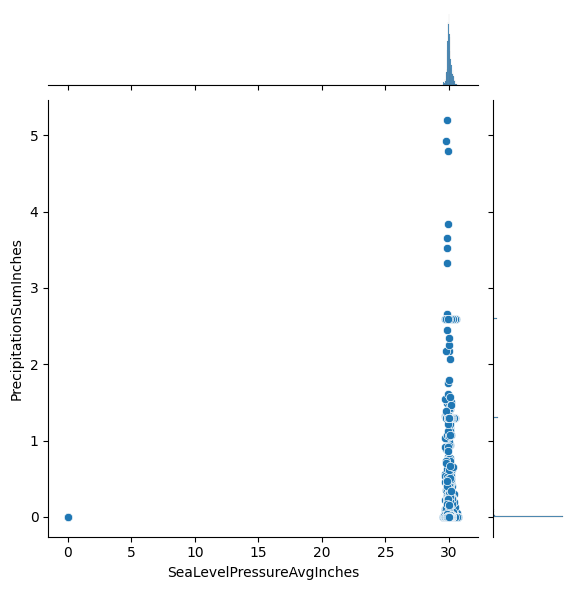

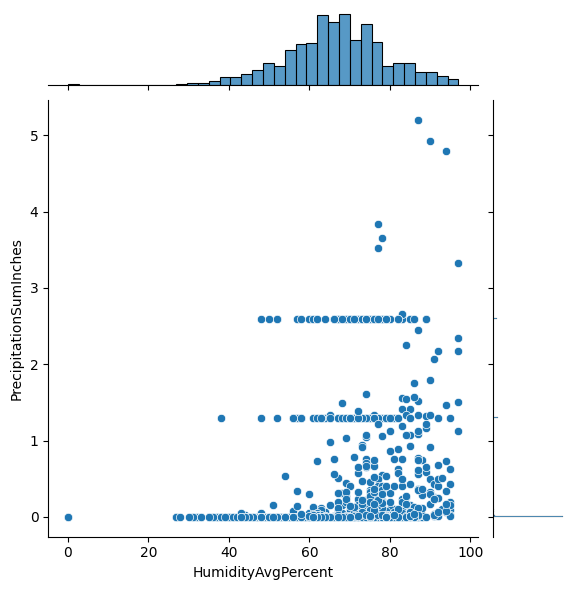

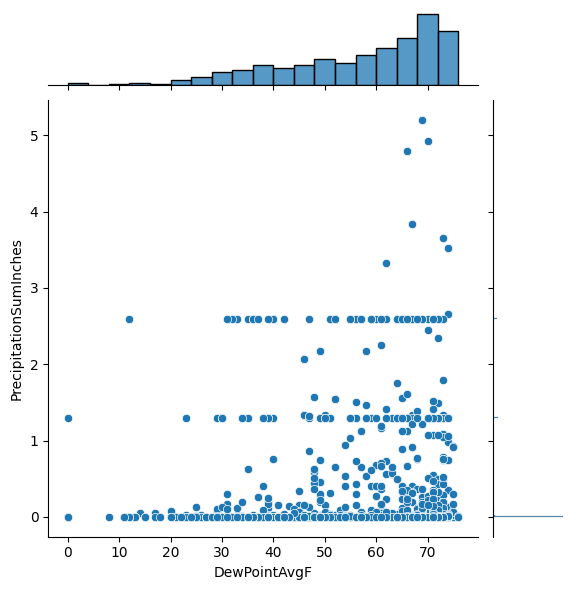

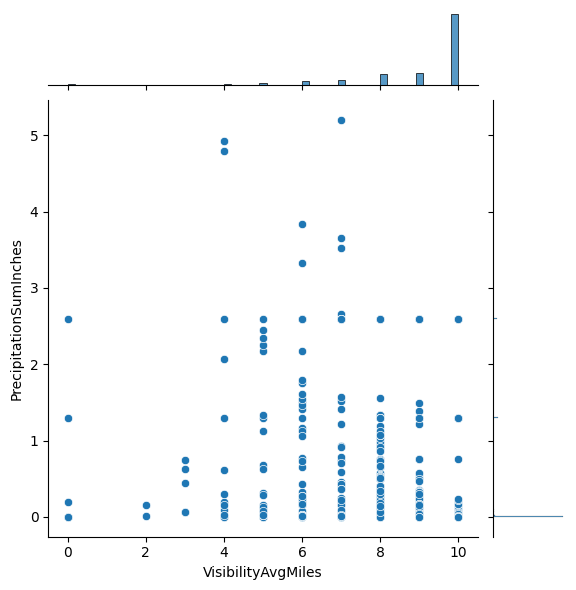

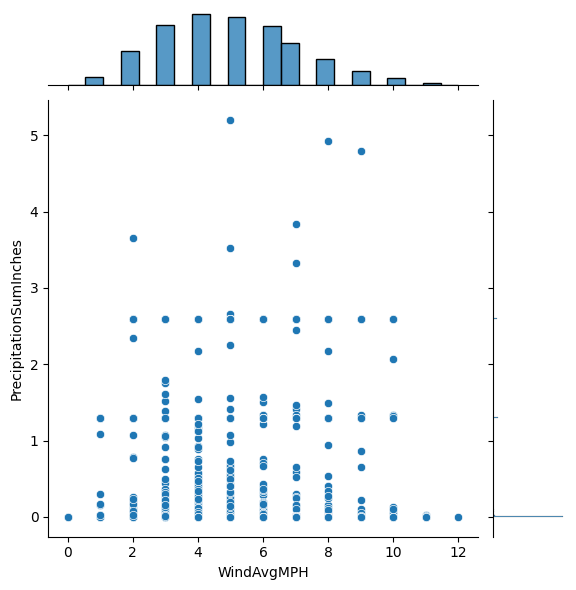

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

import seaborn as sns
import pandas as pd
# read the cleaned data
data = pd.read_csv("/content/drive/MyDrive/Final Project/austin_weather1.csv")



# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column
# will serve as the label
#X = data.drop(['PrecipitationSumInches'], axis=1)
#data = data.drop(['Date', 'SeaLevelPressureHighInches',
                  #'SeaLevelPressureLowInches'], axis=1)
#features = data[['TempHighF','TempAvgF','TempLowF','DewPointHighF','DewPointAvgF','DewPointLowF','HumidityHighPercent','HumidityAvgPercent','HumidityLowPercent','SeaLevelPressureAvgInches','VisibilityHighMiles','VisibilityAvgMiles','VisibilityLowMiles','WindHighMPH','WindAvgMPH','WindGustMPH']]

rainfall_data = data[['SeaLevelPressureAvgInches','PrecipitationSumInches']]
#print(rainfall_data)
# Create a joint plot
sns.jointplot(data=rainfall_data, x='SeaLevelPressureAvgInches', y='PrecipitationSumInches', kind='scatter')

# Show the plot
import matplotlib.pyplot as plt
plt.show()



rainfall_data = data[['HumidityAvgPercent','PrecipitationSumInches']]
#print(rainfall_data)
# Create a joint plot
sns.jointplot(data=rainfall_data, x='HumidityAvgPercent', y='PrecipitationSumInches', kind='scatter')

# Show the plot
import matplotlib.pyplot as plt
plt.show()


rainfall_data = data[['DewPointAvgF','PrecipitationSumInches']]
#print(rainfall_data)
# Create a joint plot
sns.jointplot(data=rainfall_data, x='DewPointAvgF', y='PrecipitationSumInches', kind='scatter')

# Show the plot
import matplotlib.pyplot as plt
plt.show()

rainfall_data = data[['VisibilityAvgMiles','PrecipitationSumInches']]
#print(rainfall_data)
# Create a joint plot
sns.jointplot(data=rainfall_data, x='VisibilityAvgMiles', y='PrecipitationSumInches', kind='scatter')

# Show the plot
import matplotlib.pyplot as plt
plt.show()


rainfall_data = data[['WindAvgMPH','PrecipitationSumInches']]
#print(rainfall_data)
# Create a joint plot
sns.jointplot(data=rainfall_data, x='WindAvgMPH', y='PrecipitationSumInches', kind='scatter')

# Show the plot
import matplotlib.pyplot as plt
plt.show()


# RainFall Prediction Using Random Forest Classifier

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
# read the cleaned data
data = pd.read_csv("/content/drive/MyDrive/Final Project/austin_weather1.csv")



# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column
# will serve as the label
#X = data.drop(['PrecipitationSumInches'], axis=1)
data = data.drop(['Date', 'SeaLevelPressureHighInches',
                  'SeaLevelPressureLowInches'], axis=1)
features = data[['TempHighF','TempAvgF','TempLowF','DewPointHighF','DewPointAvgF','DewPointLowF','HumidityHighPercent','HumidityAvgPercent','HumidityLowPercent','SeaLevelPressureAvgInches','VisibilityHighMiles','VisibilityAvgMiles','VisibilityLowMiles','WindHighMPH','WindAvgMPH','WindGustMPH']]

acc = []
model = []

target = data['Events']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Random Forest's Accuracy is:  0.6893939393939394
                           precision    recall  f1-score   support

                     Rain       0.81      0.90      0.85       158
      Rain , Thunderstorm       0.25      0.07      0.11        14
                      Fog       0.67      0.67      0.67         6
               Fog , Rain       0.25      0.20      0.22         5
Fog , Rain , Thunderstorm       0.62      0.71      0.67         7
                     Rain       0.50      0.50      0.50        42
      Rain , Thunderstorm       0.33      0.29      0.31        28
             Thunderstorm       0.00      0.00      0.00         4

                 accuracy                           0.69       264
                macro avg       0.43      0.42      0.42       264
             weighted avg       0.65      0.69      0.66       264



# RainFall Prediction Using Neural Network Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# read the cleaned data
data = pd.read_csv("/content/drive/MyDrive/Final Project/austin_weather1.csv")



# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column
# will serve as the label
# X = data.drop(['PrecipitationSumInches'], axis=1)



acc = []
model = []

data = data.drop(['Date', 'SeaLevelPressureHighInches',
                  'SeaLevelPressureLowInches'], axis=1)

features = data[['TempHighF','TempAvgF','TempLowF','DewPointHighF','DewPointAvgF','DewPointLowF','HumidityHighPercent','HumidityAvgPercent','HumidityLowPercent','SeaLevelPressureAvgInches','VisibilityHighMiles','VisibilityAvgMiles','VisibilityLowMiles','WindHighMPH','WindAvgMPH','WindGustMPH']]

target = data['Events']
X=features.values
y=target.values
print(y)

# Assuming 'y' is your categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target)
print(y_encoded)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, y_encoded, test_size=0.2, random_state=42)
#print(X_train)
# Normalize/Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create MLPClassifier model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', random_state=42)

# Train the model
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = mlp_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Generate classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp_classifier, X, y, cv=5, scoring='accuracy')

['Rain , Thunderstorm' ' Rain' ' Rain' ... ' Rain' ' Rain' ' Rain']
[8 0 0 ... 0 0 0]
Test Accuracy: 70.08%
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       171
           1       0.12      0.09      0.11        11
           2       0.50      1.00      0.67         1
           3       0.50      1.00      0.67         1
           4       0.67      0.33      0.44         6
           6       0.35      0.48      0.41        33
           8       0.58      0.40      0.47        35
           9       0.00      0.00      0.00         6

    accuracy                           0.70       264
   macro avg       0.45      0.52      0.45       264
weighted avg       0.69      0.70      0.69       264



# RainFall Prediction Using hybrid Random Forest and Adaboost Classifier Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =32)
# Initialize classifiers
rf_classifier = RandomForestClassifier(n_estimators=40, random_state=42)
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Create a voting classifier combining RandomForest and AdaBoost
voting_classifier = VotingClassifier(estimators=[('RandomForest', rf_classifier), ('AdaBoost', ada_classifier)],
                                     voting='soft')  # Soft voting for probabilities

# Train the voting classifier
voting_classifier.fit(Xtrain, Ytrain)

# Make predictions using the voting classifier
predictions = voting_classifier.predict(Xtest)
print("Hybrid Random Forest and Adaboost Classifier" )
# Calculate accuracy
accuracy = accuracy_score(Ytest, predictions)
print(f'Test Accuracy (Voting Classifier): {accuracy * 100:.2f}%')

print(classification_report(Ytest,predictions))
# Calculate accuracy
# give a sample input to test our model
# this is a 2-D vector that contains values
# for each column in the dataset.
temphigh = int(input("Enter TempHighF : "))
tempavg = int(input("Enter TempAvgF : "))
templow = int(input("Enter TempLowF : "))
DewPointHigh = int(input("Enter DewPointHighF : "))
DewPointAvg = int(input("Enter DewPointAvgF : "))
DewPointLow = int(input("Enter DewPointLowF : "))
HumidityHigh = int(input("Enter HumidityHighPercent : "))
HumidityAvg = int(input("Enter HumidityAvgPercent : "))
HumidityLow = int(input("Enter HumidityLowPercent : "))
SeaLevelPressureAvg = float(input("Enter SeaLevelPressureAvgInches : "))
VisibilityHighMiles = int(input("Enter VisibilityHighMiles : "))
VisibilityAvgMiles = int(input("Enter VisibilityAvgMiles : "))
VisibilityLowMiles = int(input("Enter VisibilityLowMiles : "))
WindHigh = int(input("Enter WindHighMPH : "))
WindAvg = int(input("Enter WindAvgMPH : "))
WindGust = int(input("Enter WindGustMPH : "))

inp = np.array([[temphigh],[tempavg],[templow],[DewPointHigh],[DewPointAvg],[DewPointLow],[HumidityHigh],[HumidityAvg],[HumidityLow],[SeaLevelPressureAvg],[VisibilityHighMiles],[VisibilityAvgMiles],[VisibilityLowMiles],[WindHigh],[WindAvg],[WindGust]])
# inp = np.array([[56], [48], [39], [43], [36], [28], [36], [28],
#                 [43], [30.13], [10], [10], [5], [16], [6], [25]])
inp = inp.reshape(1, -1)
# print the output.
print('\nThe Rainfall Prediction For the input is:', voting_classifier.predict(inp))

# 'TempHighF'
# 'TempAvgF'
# 'TempLowF'
# 'DewPointHighF'
# 'DewPointAvgF'
# 'DewPointLowF'
# 'HumidityHighPercent'
# 'HumidityAvgPercent'
# 'HumidityLowPercent'
# 'SeaLevelPressureAvgInches'
# 'VisibilityHighMiles'
# 'VisibilityAvgMiles'
# 'VisibilityLowMiles'
# 'WindHighMPH'
# 'WindAvgMPH'
# 'WindGustMPH'

Hybrid Random Forest and Adaboost Classifier
Test Accuracy (Voting Classifier): 81.82%
                           precision    recall  f1-score   support

                     Rain       0.89      0.96      0.92       182
      Rain , Thunderstorm       1.00      0.17      0.29         6
                      Fog       0.60      0.75      0.67         8
               Fog , Rain       0.00      0.00      0.00         4
Fog , Rain , Thunderstorm       0.71      0.83      0.77         6
                     Rain       0.55      0.48      0.52        33
      Rain , Thunderstorm       0.67      0.64      0.65        22
             Thunderstorm       0.00      0.00      0.00         3

                 accuracy                           0.82       264
                macro avg       0.55      0.48      0.48       264
             weighted avg       0.80      0.82      0.80       264

Enter TempHighF : 74
Enter TempAvgF : 60
Enter TempLowF : 45
Enter DewPointHighF : 67
Enter DewPointAvgF :

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,y_encoded,test_size = 0.2,random_state =32)

xgb_classifier.fit(Xtrain, Ytrain)

# Make predictions using the voting classifier
predictions = xgb_classifier.predict(Xtest)
print("XGBoost model" )
# Calculate accuracy
accuracy = accuracy_score(Ytest, predictions)
print(f'Test Accuracy (Voting Classifier): {accuracy * 100:.2f}%')

XGBoost model
Test Accuracy (Voting Classifier): 80.68%


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,y_encoded,test_size = 0.2,random_state =32)

rf_classifier = RandomForestClassifier(n_estimators=40, random_state=42)
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=60, random_state=42)


# Create a voting classifier combining RandomForest and AdaBoost
voting_classifier = VotingClassifier(estimators=[('RandomForest', rf_classifier), ('AdaBoost', ada_classifier),('XGBoost',xgb_classifier)],
                                     voting='soft')  # Soft voting for probabilities

# Train the voting classifier
voting_classifier.fit(Xtrain, Ytrain)

# Make predictions using the voting classifier
predictions = voting_classifier.predict(Xtest)
print("Hybrid Random Forest and Adaboost Classifier" )
# Calculate accuracy
accuracy = accuracy_score(Ytest, predictions)
print(f'Test Accuracy (Voting Classifier): {accuracy * 100:.2f}%')

Hybrid Random Forest and Adaboost Classifier
Test Accuracy (Voting Classifier): 82.20%


 # Crop Recommendation

In [ ]:
# importing libraries
# Crop Recommendation For Particular Rainfall
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Final Project/Rainfall_and_Crop.csv')

# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column
# will serve as the label Date	TempHighF	TempAvgF	TempLowF	DewPointHighF	DewPointAvgF	DewPointLowF	HumidityHighPercent	HumidityAvgPercent	HumidityLowPercent	SeaLevelPressureHighInches	SeaLevelPressureAvgInches	SeaLevelPressureLowInches	VisibilityHighMiles	VisibilityAvgMiles	VisibilityLowMiles	WindHighMPH	WindAvgMPH	WindGustMPH
df = df.drop(['Date','TempHighF','TempAvgF','TempLowF','DewPointHighF','DewPointAvgF','DewPointLowF','HumidityHighPercent','HumidityAvgPercent','HumidityLowPercent','SeaLevelPressureHighInches','SeaLevelPressureAvgInches','SeaLevelPressureLowInches','VisibilityHighMiles','VisibilityAvgMiles','VisibilityLowMiles','WindHighMPH','WindAvgMPH','WindGustMPH'], axis=1)
#X = data.drop(['PrecipitationSumInches'], axis=1)

df.head()

,PrecipitationSumInches,N,P,K,temperature,humidity,ph,Events,label
0,0.0,106,10,49,27.726531,92.006875,6.350624,Rain,muskmelon
1,0.0,102,25,50,28.204808,92.914404,6.099662,Rain,muskmelon
2,0.0,84,29,49,29.943492,93.907412,6.251420,Rain,muskmelon
3,0.0,106,20,51,29.730197,90.970157,6.342573,Rain,muskmelon
4,0.0,95,21,47,27.931142,93.561614,6.431971,Rain,muskmelon


In [ ]:
df.tail()

,PrecipitationSumInches,N,P,K,temperature,humidity,ph,Events,label
1314,3.66,21,9,40,24.511477,90.644987,5.956402,"Fog , Rain , Thunderstorm",pomegranate
1315,3.84,18,23,44,23.710281,89.617942,6.184400,"Fog , Rain , Thunderstorm",pomegranate
1316,4.79,8,28,38,23.225940,94.429714,6.844402,Rain,pomegranate
1317,4.93,13,144,197,22.921571,94.896134,6.280223,"Fog , Rain , Thunderstorm",apple
1318,5.20,16,10,41,24.774645,85.636087,6.738994,"Fog , Rain , Thunderstorm",pomegranate


In [ ]:
df.size

11871

In [ ]:
df.shape

(1319, 9)

In [ ]:
df.columns

Index(['PrecipitationSumInches', 'N', 'P', 'K', 'temperature', 'humidity',
       'ph', 'Events', 'label'],
      dtype='object')

In [ ]:
df['label'].unique()

array(['muskmelon', 'mothbeans', 'lentil', 'mungbean', 'watermelon',
       'papaya', 'kidneybeans', 'blackgram', 'maize', 'cotton', 'grapes',
       'chickpea', 'mango', 'pigeonpeas', 'banana', 'apple', 'orange',
       'pomegranate'], dtype=object)

In [ ]:
df.dtypes

PrecipitationSumInches    float64
N                           int64
P                           int64
K                           int64
temperature               float64
humidity                  float64
ph                        float64
Events                     object
label                      object
dtype: object

In [ ]:
df['label'].value_counts()

label
muskmelon      100
blackgram      100
mango          100
chickpea       100
grapes         100
mothbeans      100
cotton         100
watermelon     100
mungbean       100
lentil         100
maize           88
banana          52
kidneybeans     47
papaya          36
pomegranate     34
apple           24
orange          23
pigeonpeas      15
Name: count, dtype: int64

In [ ]:
newdf = df.copy()
newdf['label'] = label_encoder.fit_transform(newdf['label'])
print(newdf['label'])

0       12
1       12
2       12
3       12
4       12
        ..
1314    16
1315    16
1316    16
1317     0
1318    16
Name: label, Length: 1319, dtype: int64


<Axes: >

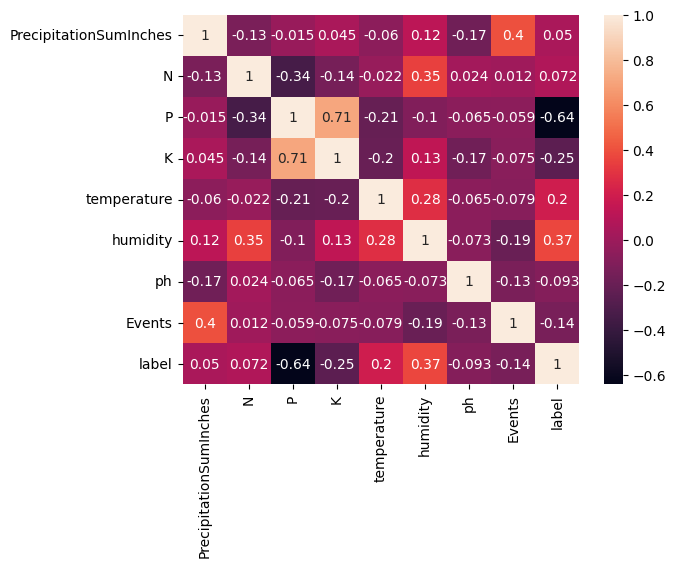

In [ ]:
sns.heatmap(newdf.corr(),annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df['Events'] = label_encoder.fit_transform(df['Events'])
print(df['Events'])

0       0
1       0
2       0
3       0
4       0
       ..
1314    4
1315    4
1316    6
1317    4
1318    4
Name: Events, Length: 1319, dtype: int64


In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'PrecipitationSumInches','Events']]
target = df['label']
labels = df['label']

# Crop Recommendation Using Hybrid Random Forest and Adaboost  Classifier

In [ ]:
acc = []
model = []

# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =52)

In [ ]:

print('Hybrid Random Forest and Adaboost Classifier')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Initialize classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=52)
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=52)

# Create a voting classifier combining RandomForest and AdaBoost
voting_classifier = VotingClassifier(estimators=[('RandomForest', rf_classifier), ('AdaBoost', ada_classifier)],
                                     voting='soft')  # Soft voting for probabilities

# Train the voting classifier
voting_classifier.fit(Xtrain, Ytrain)

# Make predictions using the voting classifier
predictions = voting_classifier.predict(Xtest)

# Calculate accuracy
accuracy = accuracy_score(Ytest, predictions)
print(f'Test Accuracy (Voting Classifier): {accuracy * 100:.2f}%')

print(classification_report(Ytest,predictions))

Hybrid Random Forest and Adaboost Classifier
Test Accuracy (Voting Classifier): 99.62%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         2
      banana       1.00      1.00      1.00        11
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        14
 kidneybeans       1.00      1.00      1.00         7
      lentil       1.00      0.95      0.98        21
       maize       1.00      1.00      1.00        14
       mango       1.00      1.00      1.00        25
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00         7
      papaya       1.00      1.00      1.00         7
  pigeonpeas       1.00      1.00      1.00     

In [ ]:
# data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
# data = np.array([[95,21,47,27.93114233,93.56161439,6.431970877,0,0]])



# inp = [float(x) for x in input().split(',')][:8]
N = float(input("Enter the Value of Nitrogen : "))
P = float(input("Enter the Value of Phosphorus : "))
K = float(input("Enter the Value of Potassium : "))
Temp = float(input("Enter the Temperature : "))
Hum = float(input("Enter the Humidity : "))
ph = float(input("Enter the ph of the soil : "))
PSI = float(input("Enter the PrecipitationSumInches : "))
event = input("Enter the Event Type : ")

data = np.array([[N,P,K,Temp,Hum,ph,PSI,event]])
# print(data)
prediction = voting_classifier.predict(data)

print('\nRecommended Crop For Particular Rainfall')
print(prediction)


Enter the Value of Nitrogen : 106
Enter the Value of Phosphorus : 10
Enter the Value of Potassium : 49
Enter the Temperature : 27.72653
Enter the Humidity : 92.00688
Enter the ph of the soil : 6.350624
Enter the PrecipitationSumInches : 0
Enter the Event Type : 0

Recommended Crop For Particular Rainfall
['muskmelon']


1# Crop Recommendation  Neural Network Classifier

In [ ]:
#Neural Network Classifier

In [ ]:
print('Neural Network Classifier')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


X=features.values
y=target.values
print(y)



y=target.values
# Assuming 'y' is your categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize/Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create MLPClassifier model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', random_state=42)

# Train the model
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = mlp_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Generate classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp_classifier, X, y, cv=5, scoring='accuracy')

scores

Neural Network Classifier
['muskmelon' 'muskmelon' 'muskmelon' ... 'pomegranate' 'apple'
 'pomegranate']
Test Accuracy: 98.86%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        16
           2       0.96      1.00      0.98        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        25
           6       0.90      1.00      0.95         9
           7       1.00      0.94      0.97        16
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        20
          12       0.95      1.00      0.97        19
          13       1.00      1.00      1.00         8
          14       1.00      1.00     

array([0.91287879, 0.89015152, 0.90909091, 0.89015152, 0.90874525])

In [ ]:
# Crop Recommendation Using Random Forest Classifier

In [ ]:

print('Random Forest Classifier')

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Random Forest Classifier
Random Forest's Accuracy is:  0.9848484848484849
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         2
      banana       1.00      1.00      1.00        11
   blackgram       0.90      0.90      0.90        20
    chickpea       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        14
 kidneybeans       1.00      1.00      1.00         7
      lentil       0.90      0.90      0.90        21
       maize       1.00      1.00      1.00        14
       mango       1.00      1.00      1.00        25
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00         7
      papaya       1.00      1.00      1.00         7
  pigeonpeas       1.00      1.00      1.00         3
 pomegr

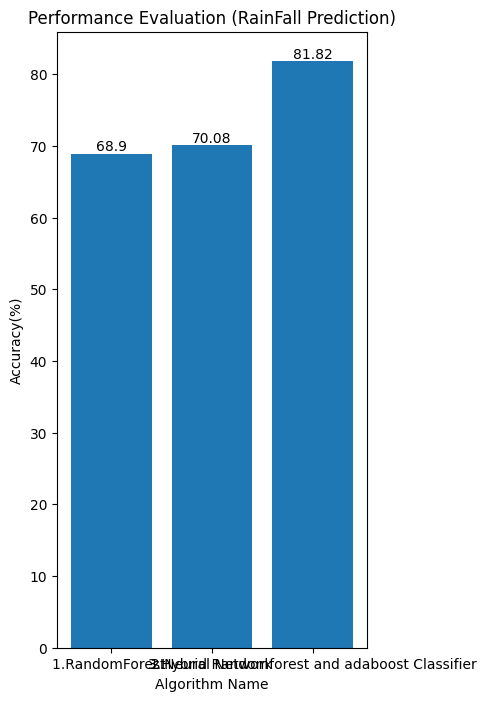

In [ ]:
# Evaluate the model on the training data
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
categories = ['1.RandomForest ', '2.Neural Network','3.Hybrid Randomforest and adaboost Classifier' ]
values = [68.9,70.08,81.82]

# Set the figure size
# plt.figure(figsize=(18, 8))
plt.figure(figsize=(4, 8))
# Create a bar chart
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Algorithm Name')
plt.ylabel('Accuracy(%)')
plt.title('Performance Evaluation (RainFall Prediction)')

# Annotate values inside the bars
for category, value in zip(categories, values):
    plt.text(category, value, str(value), ha='center', va='bottom')
# Display the chart
plt.show()

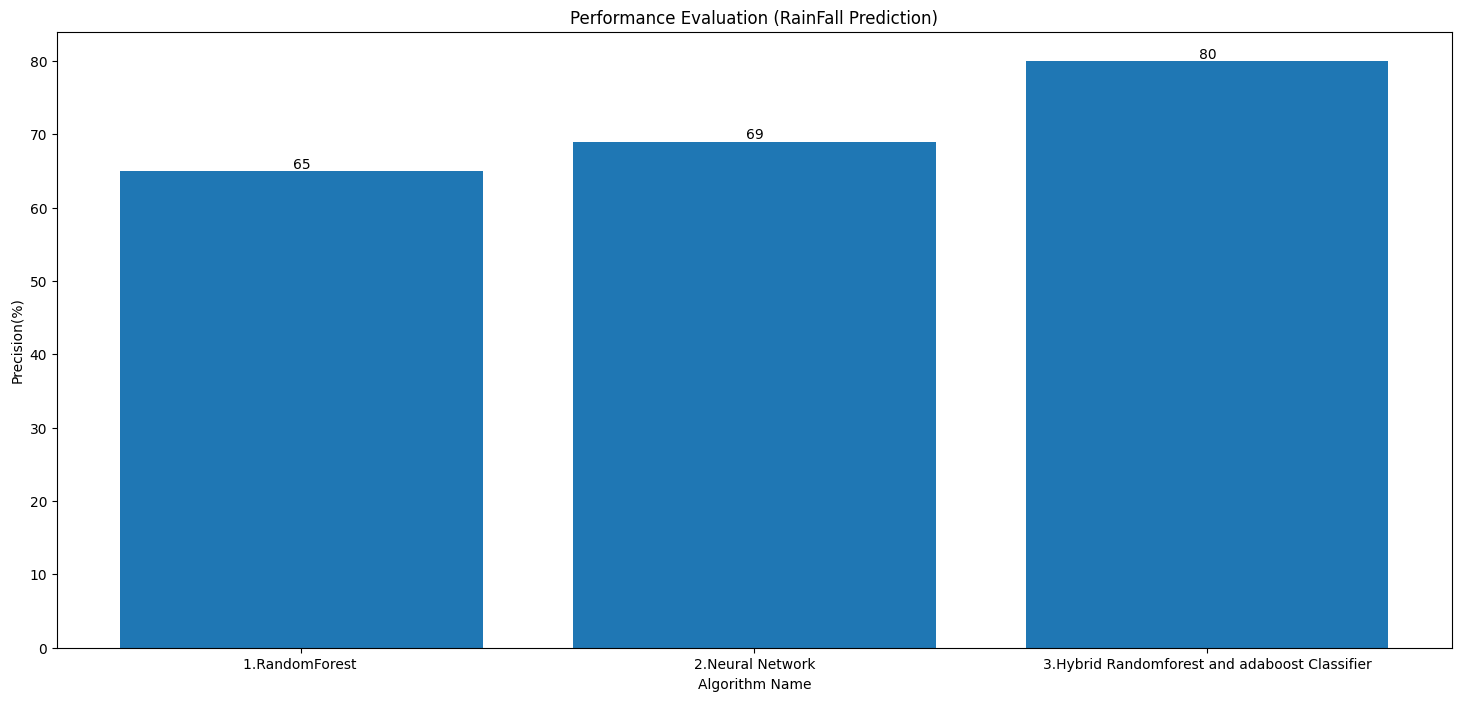

In [ ]:
# Evaluate the model on the training data
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
categories = ['1.RandomForest ', '2.Neural Network','3.Hybrid Randomforest and adaboost Classifier' ]
values = [65,69,80]

# Set the figure size
plt.figure(figsize=(18, 8))
# Create a bar chart
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Algorithm Name')
plt.ylabel('Precision(%)')
plt.title('Performance Evaluation (RainFall Prediction)')

# Annotate values inside the bars
for category, value in zip(categories, values):
    plt.text(category, value, str(value), ha='center', va='bottom')
# Display the chart
plt.show()

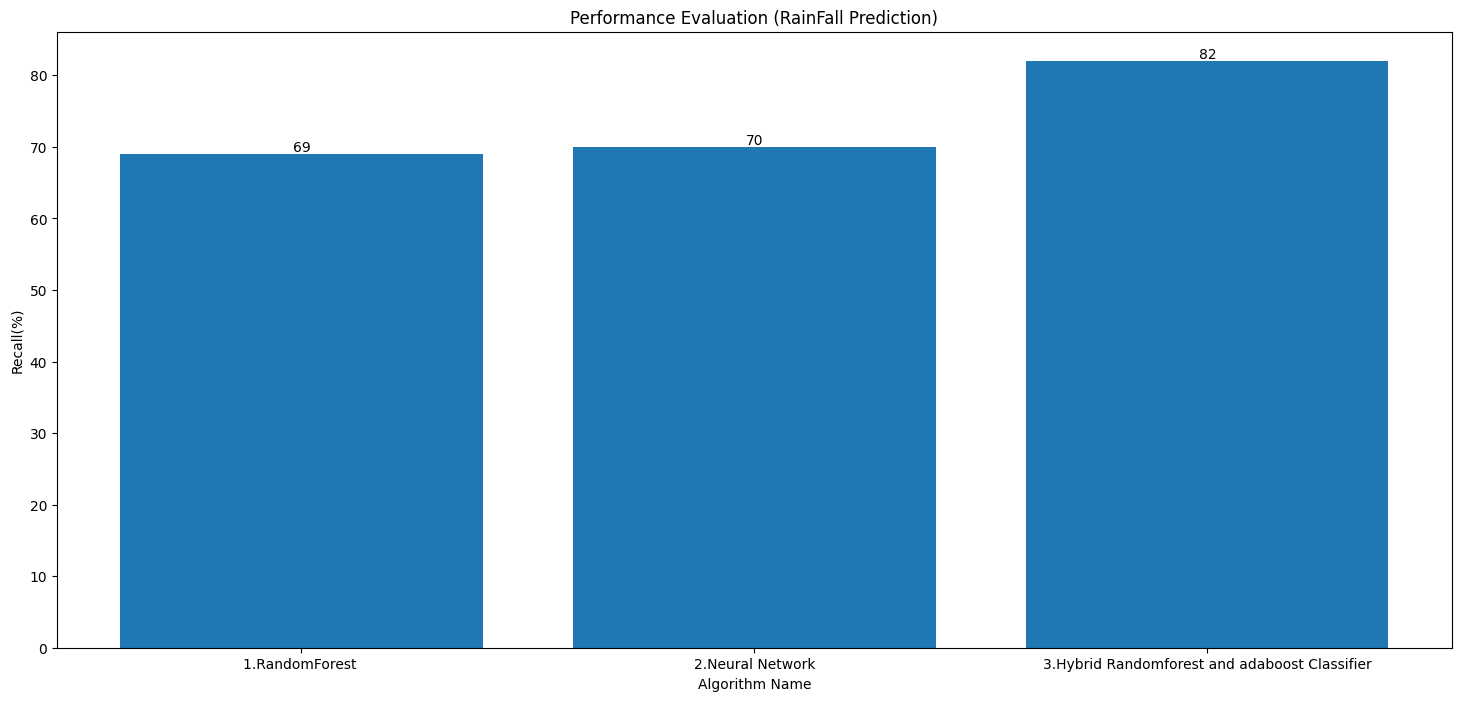

In [ ]:
# Evaluate the model on the training data
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
categories = ['1.RandomForest ', '2.Neural Network','3.Hybrid Randomforest and adaboost Classifier' ]
values = [69,70,82]

# Set the figure size
plt.figure(figsize=(18, 8))
# Create a bar chart
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Algorithm Name')
plt.ylabel('Recall(%)')
plt.title('Performance Evaluation (RainFall Prediction)')

# Annotate values inside the bars
for category, value in zip(categories, values):
    plt.text(category, value, str(value), ha='center', va='bottom')
# Display the chart
plt.show()

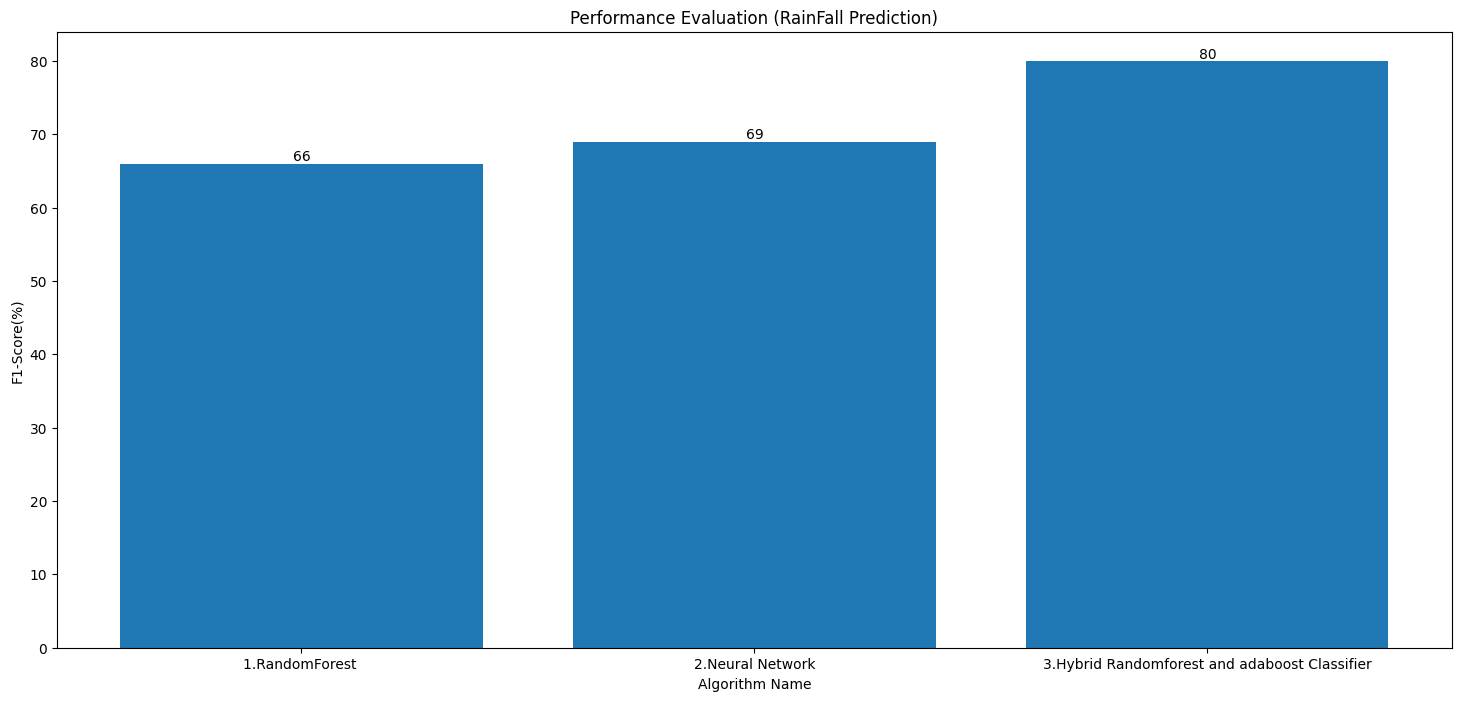

In [ ]:
# Evaluate the model on the training data
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
categories = ['1.RandomForest ', '2.Neural Network','3.Hybrid Randomforest and adaboost Classifier' ]
values = [66,69,80]

# Set the figure size
plt.figure(figsize=(18, 8))
# Create a bar chart
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Algorithm Name')
plt.ylabel('F1-Score(%)')
plt.title('Performance Evaluation (RainFall Prediction)')

# Annotate values inside the bars
for category, value in zip(categories, values):
    plt.text(category, value, str(value), ha='center', va='bottom')
# Display the chart
plt.show()

# Crop Recommenation Performence

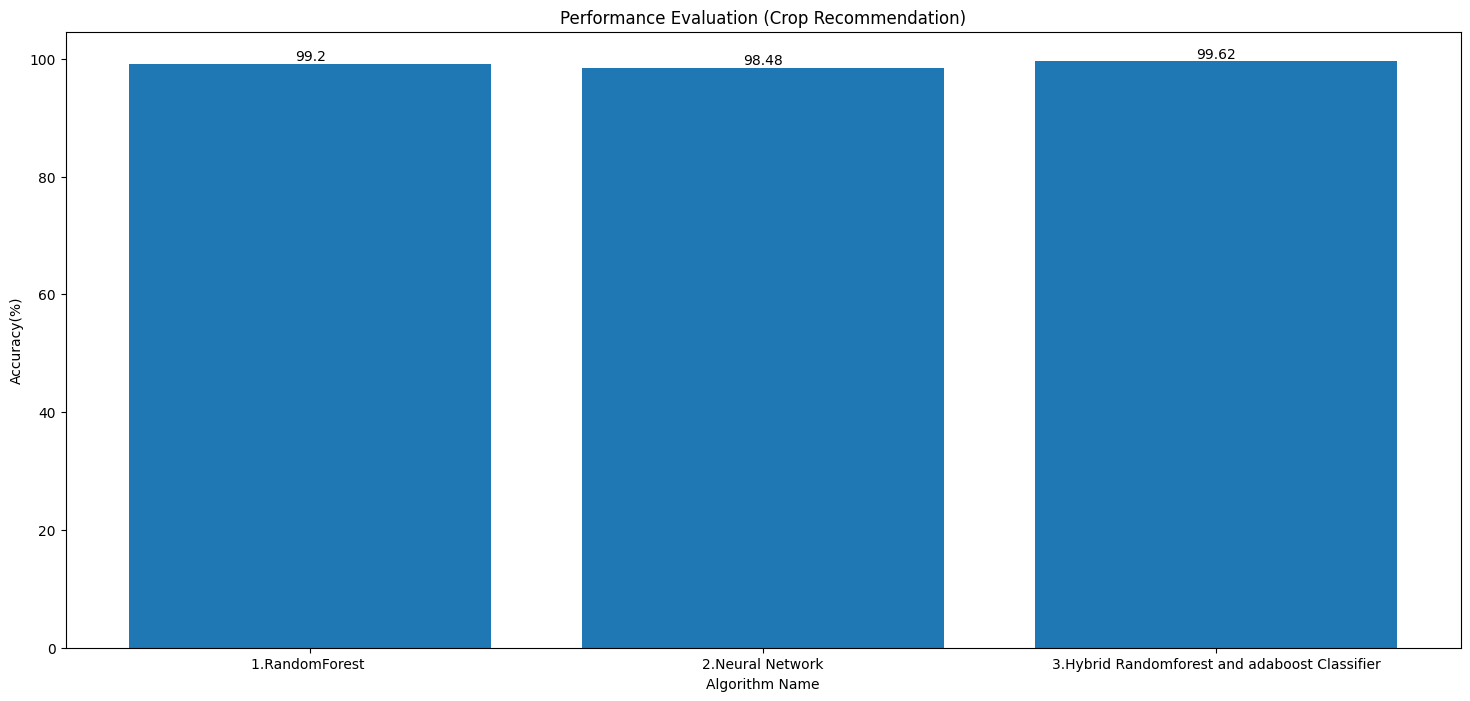

In [ ]:
# Evaluate the model on the training data
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
categories = ['1.RandomForest ', '2.Neural Network','3.Hybrid Randomforest and adaboost Classifier' ]
values = [99.2,98.48,99.62]

# Set the figure size
plt.figure(figsize=(18, 8))
# Create a bar chart
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Algorithm Name')
plt.ylabel('Accuracy(%)')
plt.title('Performance Evaluation (Crop Recommendation)')

# Annotate values inside the bars
for category, value in zip(categories, values):
    plt.text(category, value, str(value), ha='center', va='bottom')
# Display the chart
plt.show()

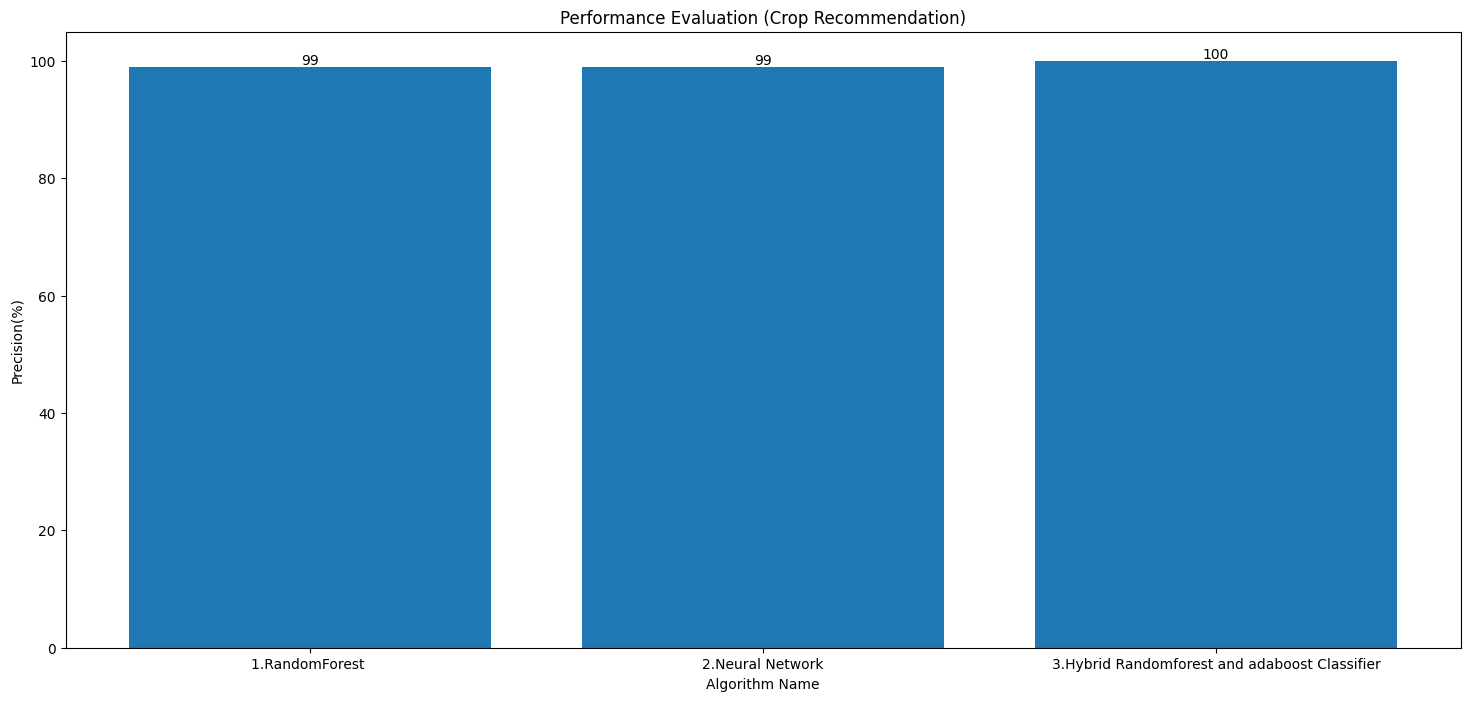

In [ ]:
# Evaluate the model on the training data
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
categories = ['1.RandomForest ', '2.Neural Network','3.Hybrid Randomforest and adaboost Classifier' ]
values = [99,99,100]

# Set the figure size
plt.figure(figsize=(18, 8))
# Create a bar chart
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Algorithm Name')
plt.ylabel('Precision(%)')
plt.title('Performance Evaluation (Crop Recommendation)')

# Annotate values inside the bars
for category, value in zip(categories, values):
    plt.text(category, value, str(value), ha='center', va='bottom')
# Display the chart
plt.show()

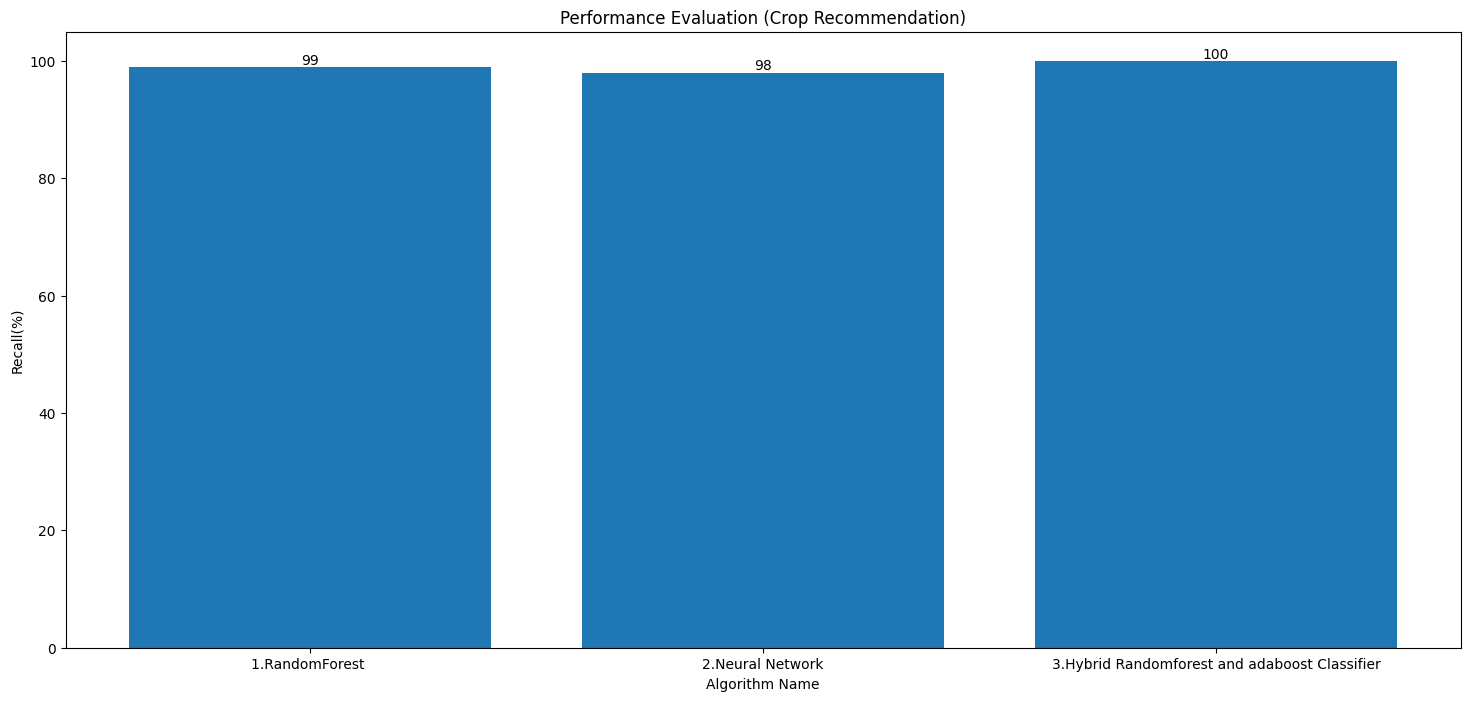

In [ ]:
# Evaluate the model on the training data
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
categories = ['1.RandomForest ', '2.Neural Network','3.Hybrid Randomforest and adaboost Classifier' ]
values = [99,98,100]

# Set the figure size
plt.figure(figsize=(18, 8))
# Create a bar chart
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Algorithm Name')
plt.ylabel('Recall(%)')
plt.title('Performance Evaluation (Crop Recommendation)')

# Annotate values inside the bars
for category, value in zip(categories, values):
    plt.text(category, value, str(value), ha='center', va='bottom')
# Display the chart
plt.show()

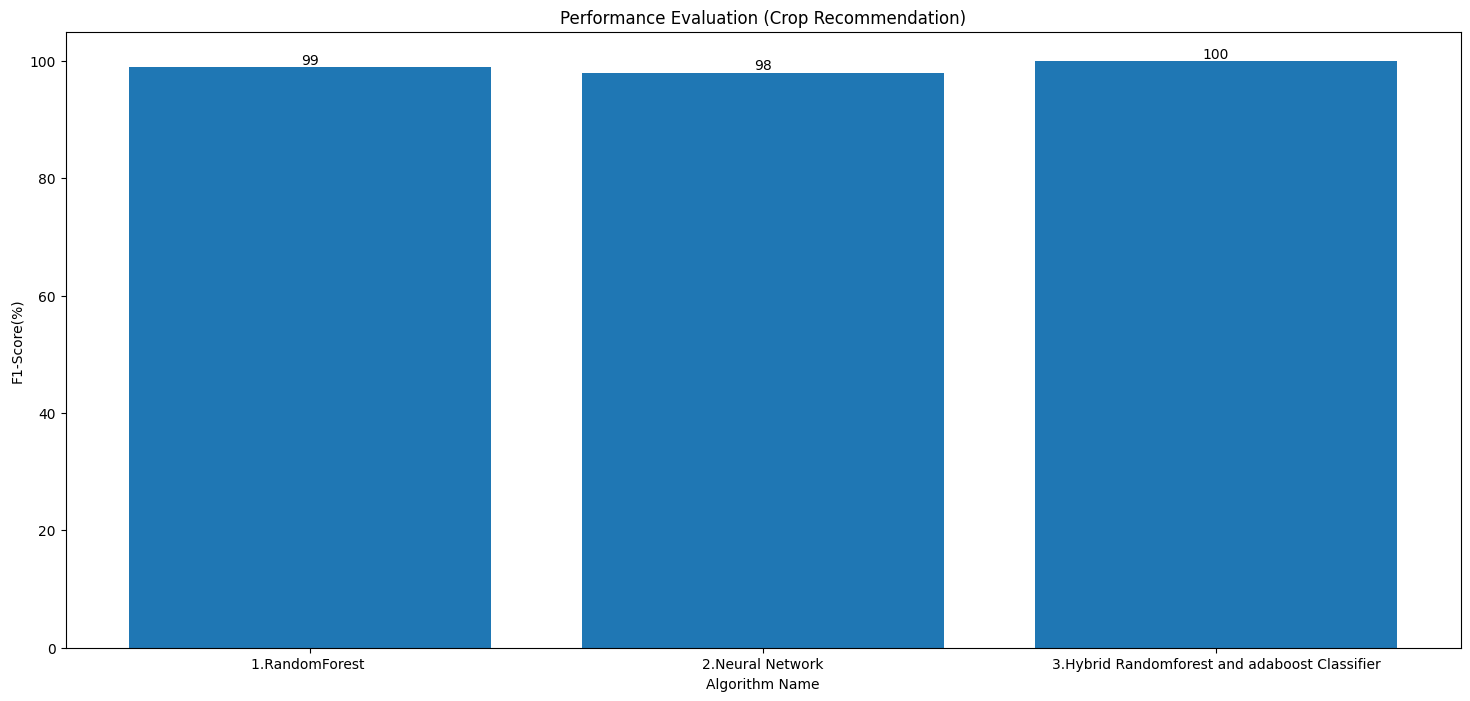

In [ ]:
# Evaluate the model on the training data
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
categories = ['1.RandomForest ', '2.Neural Network','3.Hybrid Randomforest and adaboost Classifier' ]
values = [99,98,100]

# Set the figure size
plt.figure(figsize=(18, 8))
# Create a bar chart
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Algorithm Name')
plt.ylabel('F1-Score(%)')
plt.title('Performance Evaluation (Crop Recommendation)')

# Annotate values inside the bars
for category, value in zip(categories, values):
    plt.text(category, value, str(value), ha='center', va='bottom')
# Display the chart
plt.show()



N


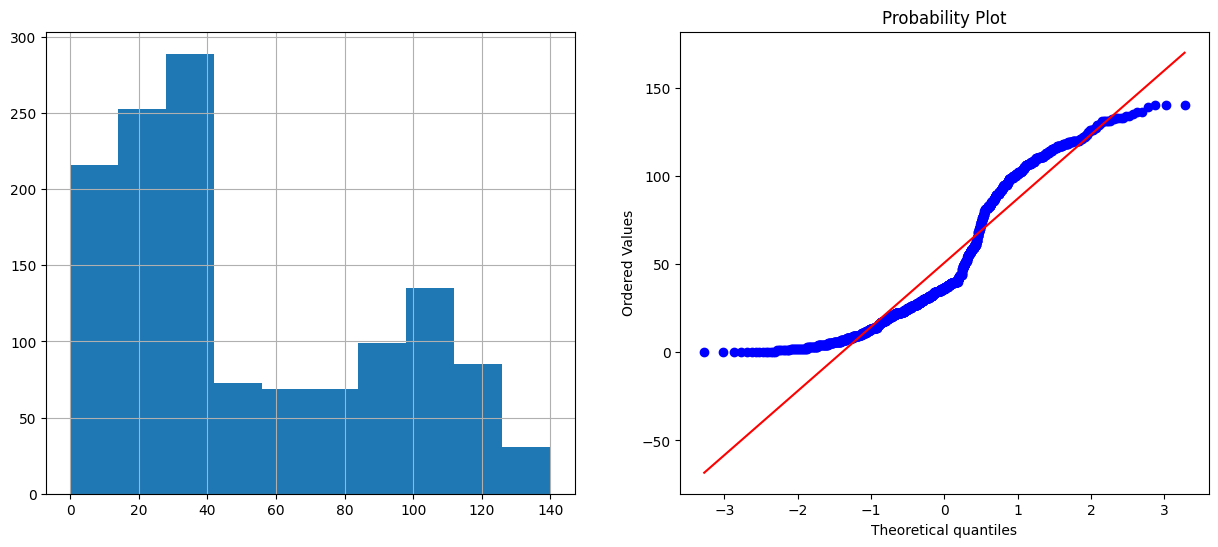

P


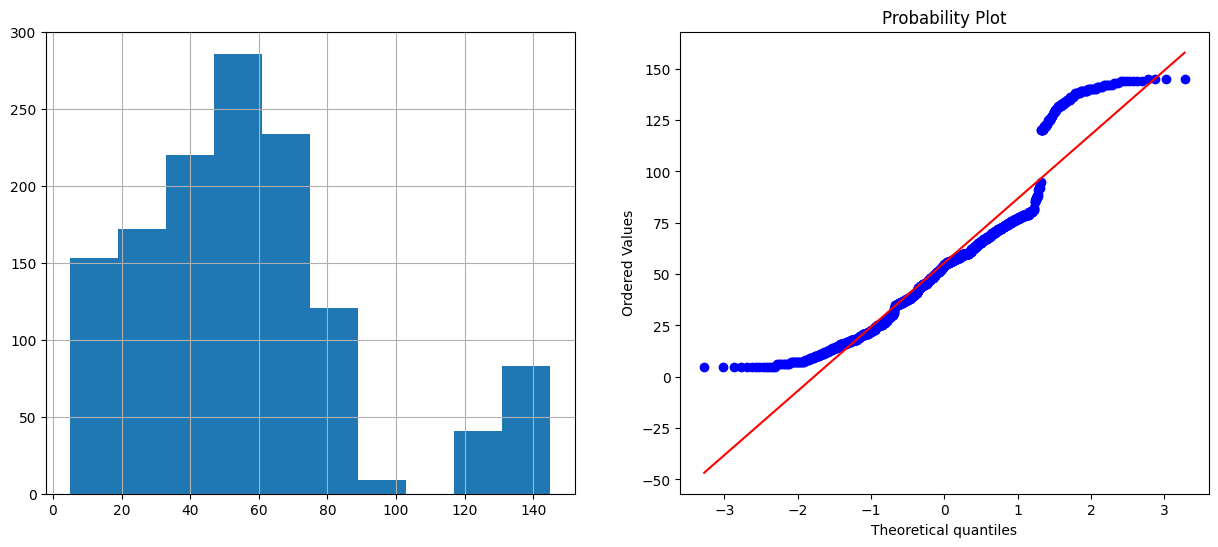

K


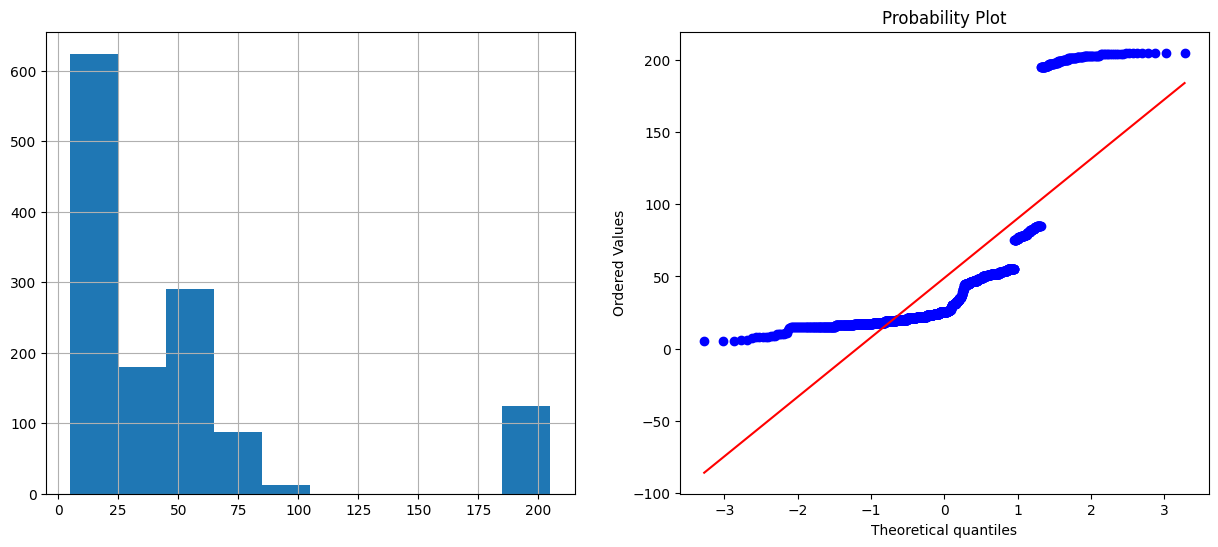

temperature


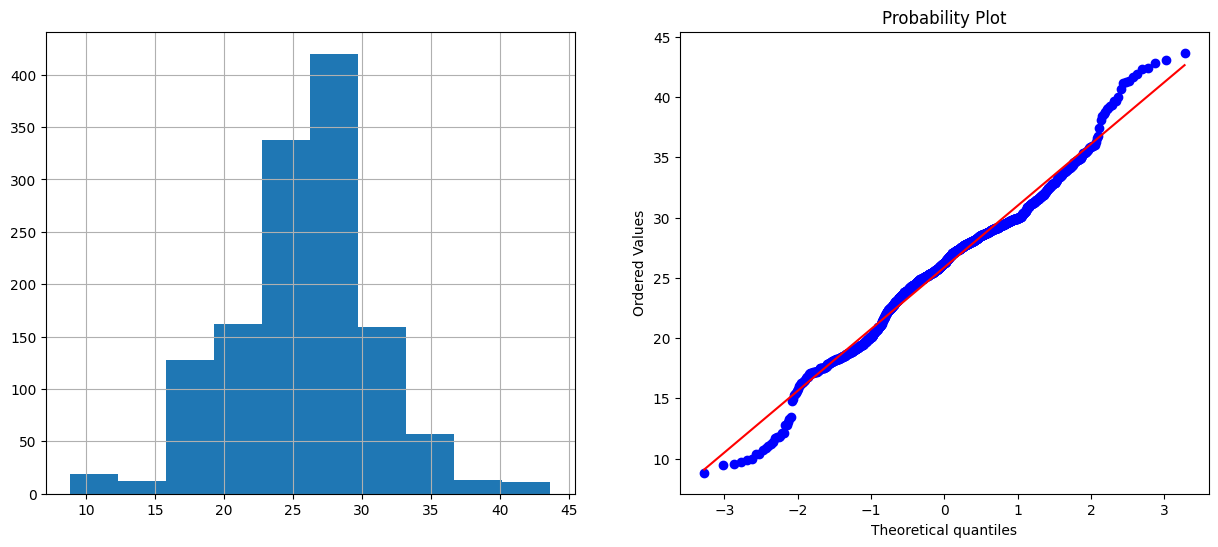

humidity


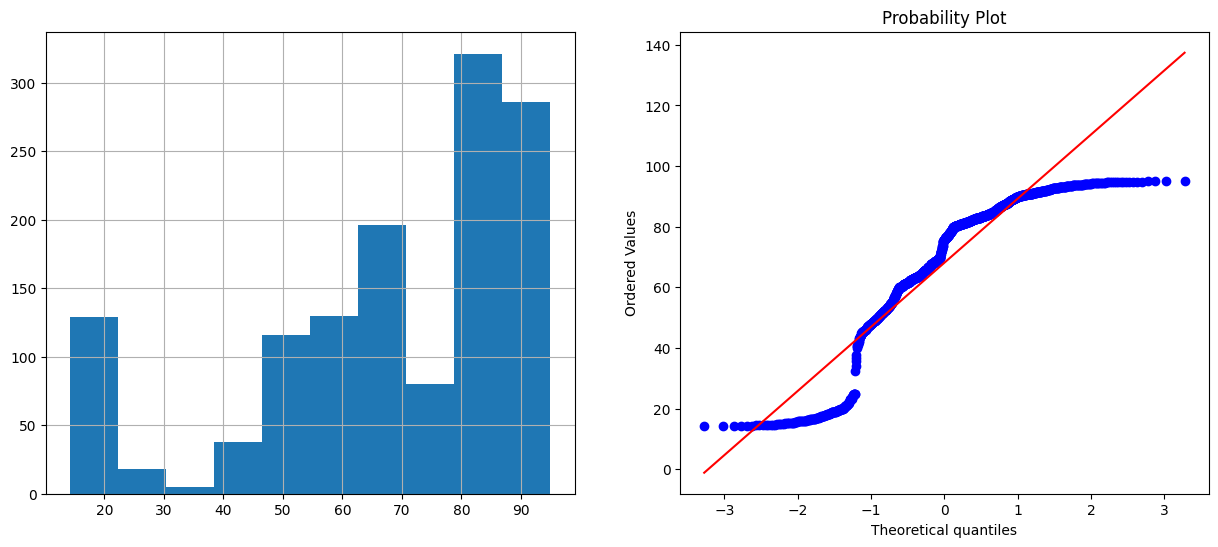

ph


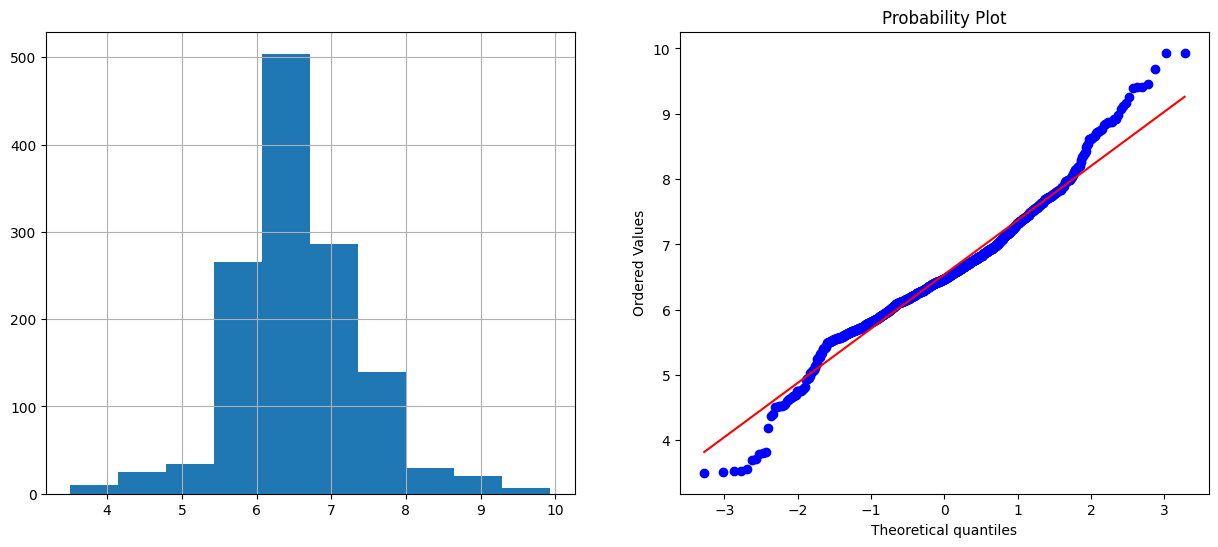

PrecipitationSumInches


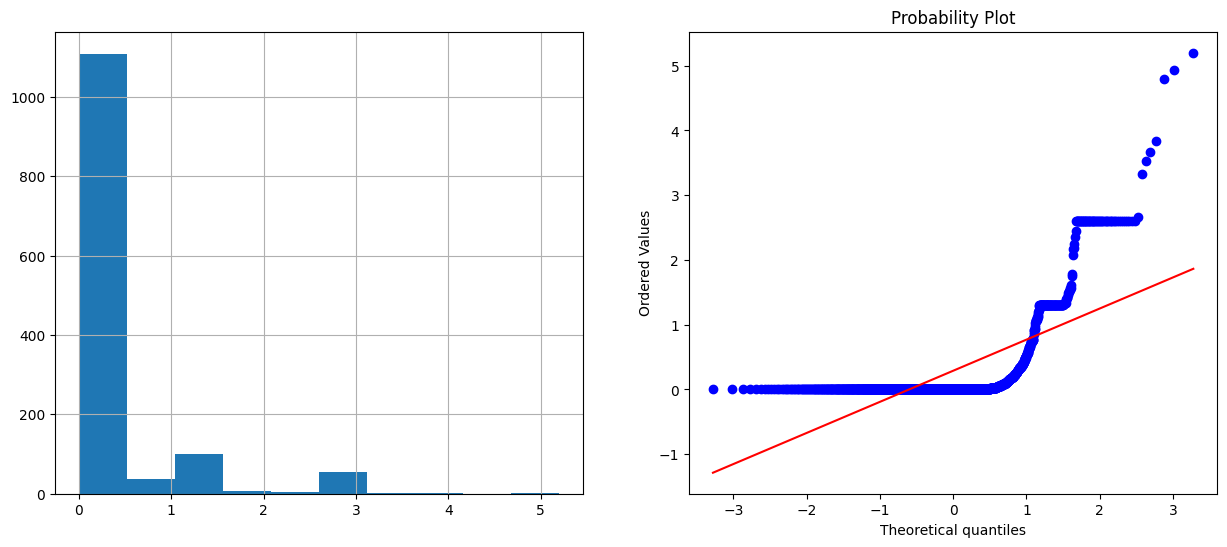

Events


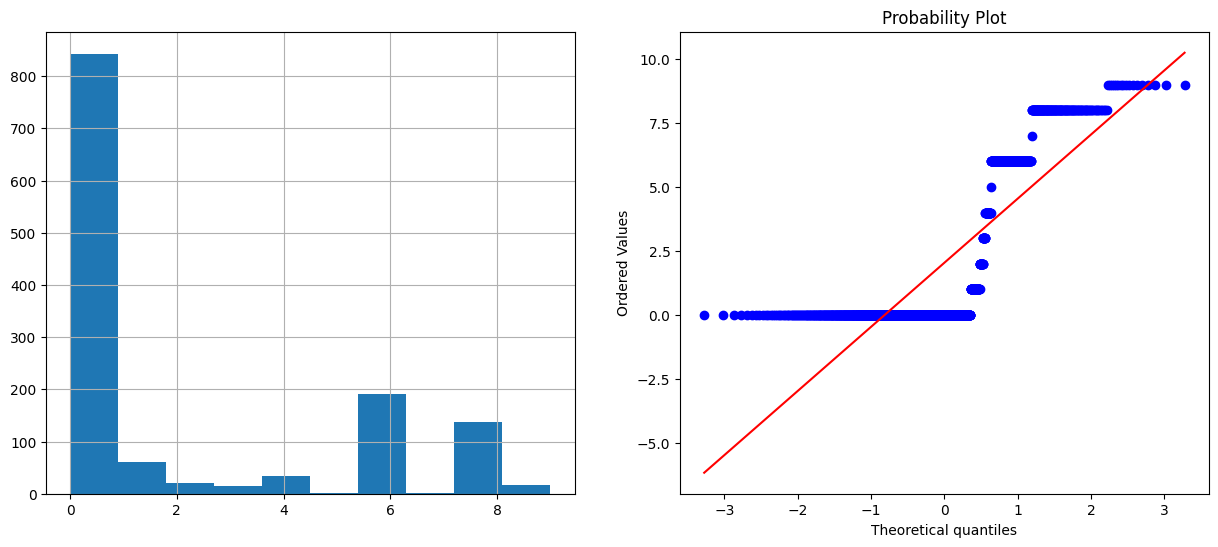

In [ ]:
import scipy.stats as stats
columns = ['N','P','K','temperature','humidity','ph','PrecipitationSumInches','Events']
for feature in columns:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist="norm",plot=plt)
    plt.show()